# IPL Data Analysis

### Overview

IPL is the short form of Indian Premier League which is a twenty- twenty cricket league played in India. It was founded in 2008 by BCCI. This league mainly concerns with finding the hidden player in country who are capable to play at international level and give a chance to play for Indian international team. It is very famous league around the world.

It has eight teams named as CSK Chennai super King and this team is owned by N. Srinivasan, Delhi Capitals owned by GM Rao, Kings XI Punjab owned by famous bollywood actress Priety Zinta, Kolkata Knight Riders owned by King of bollywood Shah Rukh Khan, Mumbai Indians owned by Mukesh Ambani and his wife Neeta Ambani, Rajasthan Royal owned by Manoj Badale and Royal Challengers Bangalore owned by Vijay Mallya. All the team participates in the league and only four team qualify for the semi final. IPL is a good platform for them who want their career in cricket and by performing well they may get chances for playing with Indian cricket team. 

In cricket and IPL, Data Science is used in a somewhat unique and interesting manner. In 2008, IPL came, which completely revolutionized the cricket world, because before IPL never had such an immense amount of money invested into cricket. Considering the auction 2020, totaled ~400 crore INR spent on the players. So much money is being spent in IPL. Data Collection and Data Analysis in IPL has breached the next level, because as IPL spending lot of money on players, it has become necessary for IPL teams to find out that, “Should they spend on a particular player or not?” or “How valuable is the player going to be for the team?”   How should they judge in detail, “Which player should they buy and which one they shouldn’t it?”, “How much money should be spent on which player?” or “What are the values of the different players?”. 

### Content

This dataset consists of two seperate CSV files named deliveries and matches. These files contain the information of ball by ball  of each ball bowled and match by match details of every match during 2008-2017 period including 10 seasons.

Analysis is done in two seperate notebooks, this being the first One

Our analysis focuses on extracting useful and exciting statistics from the data by using python.

## Analysis covered in this notebook :

1. Indepth Analysis of Virat Kohli Performance
2. Score Distribution For Teams by Innings
3. Analysing How many times teams scores more than 200
4. Batsman Comparison
5. Top Individual Scores
6. Highest Wicket Taker

#### Reading csv data File and printing first 10 Row

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'C:\Users\Eren Yaeger\Downloads\IPL Analysis/deliveries.csv')
df.head(10)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


### Getting an idea of size of data

In [3]:
df.shape

(150460, 21)

## Indepth Analysis of Virat Kohli Performance

#### Filtering out data in which Virat Kohli is on_strike

In [121]:
df_kohli=df[df['batsman']=='V Kohli']
df_kohli.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2598,12,1,Royal Challengers Bangalore,Mumbai Indians,2,2,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2603,12,1,Royal Challengers Bangalore,Mumbai Indians,3,1,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
2604,12,1,Royal Challengers Bangalore,Mumbai Indians,3,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2605,12,1,Royal Challengers Bangalore,Mumbai Indians,3,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2606,12,1,Royal Challengers Bangalore,Mumbai Indians,3,4,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


#### Count of Various Dismissal Count of Virat Kohli

In [122]:
df_kohli['dismissal_kind'].value_counts()

caught               76
bowled               24
run out              14
lbw                   7
stumped               3
caught and bowled     2
Name: dismissal_kind, dtype: int64

#### Plotting the same on Pie Chart

<AxesSubplot:ylabel='dismissal_kind'>

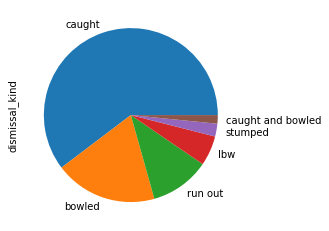

In [123]:
df_kohli['dismissal_kind'].value_counts().plot.pie()

#### Total fours by Virat Kohli

In [124]:
len(df_kohli[df_kohli['batsman_runs']==4])

384

##### Total 6s by Virat Kohli

In [125]:
len(df_kohli[df_kohli['batsman_runs']==6])

160

##### Total runs made by Virat Kohli

In [170]:
df_kohli['total_runs'].sum()

4588

#### Number of 1s,2s,3s,4s,6s scored by Virat Kohli

In [133]:
def count(df,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs])

In [128]:
count(df_kohli,1)

1410

In [134]:
count(df_kohli,2)

242

In [135]:
count(df_kohli,3)

11

In [136]:
count(df_kohli,4)

384

In [137]:
count(df_kohli,6)

160

#### Pie Chart of Runs Distribution of Kohli

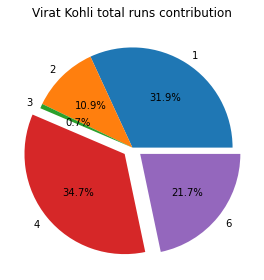

In [148]:
slices=[1410*1,242*2,11*3,384*4,160*6]
labels=[1,2,3,4,6]
explode=[0,0,0,0.1,0.1]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title("Virat Kohli total runs contribution")
plt.tight_layout()
plt.show()

#### So Virat Kohli scored 23.9% of his runs through Sixes

In [149]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Unique Team Names

In [150]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

##### Replacing the Team Names with their abbreviations

In [151]:


Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}

In [152]:
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

In [153]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Score Distribution For Teams by Innings

### Grouping Dataframe by Innings and Runs Scored by them in that Innings

In [56]:
runs=df.groupby(['match_id','inning','batting_team'])[['total_runs']].sum().reset_index()
runs

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1279,634,2,KKR,140
1280,635,1,GL,162
1281,635,2,SRH,163
1282,636,1,SRH,208


### Runs scored by CSK in various Innings

In [60]:
csk_innings=runs[runs['batting_team']=='CSK']
csk_innings.head()

,match_id,inning,batting_team,total_runs
122,61,1,CSK,240
134,67,1,CSK,208
143,71,2,CSK,152
148,74,1,CSK,178
158,79,1,CSK,169


#### Seperating Runs Dataframe by Innings

In [61]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

In [62]:
inning1.head()

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
2,2,1,MI,184
4,3,1,GL,183
6,4,1,RPS,163
8,5,1,RCB,157


In [63]:
inning2.head()

,match_id,inning,batting_team,total_runs
1,1,2,RCB,172
3,2,2,RPS,187
5,3,2,KKR,184
7,4,2,KXIP,164
9,5,2,DD,142


### Plotting Boxplot of Runs scored by various teams in all Matches

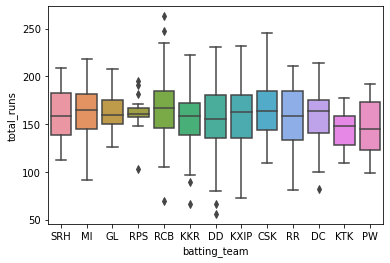

In [23]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

##### According to this plot, the batting by CSK & RCB seems best. 

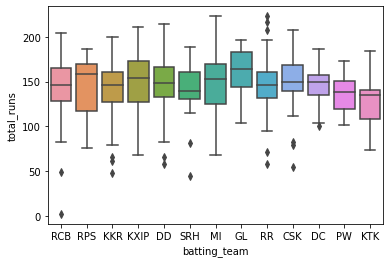

In [24]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

##### this figure also conveys the same story.in this, we see a point near 0 for RCB which may seem to be outlier. But it is on account of the match was disrupted.

## Analysing How many times teams scores more than 200

In [174]:
high_scores=df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,172
2,2,1,Mumbai Indians,Rising Pune Supergiant,184
3,2,2,Rising Pune Supergiant,Mumbai Indians,187
4,3,1,Gujarat Lions,Kolkata Knight Riders,183
...,...,...,...,...,...
1279,634,2,Kolkata Knight Riders,Sunrisers Hyderabad,140
1280,635,1,Gujarat Lions,Sunrisers Hyderabad,162
1281,635,2,Sunrisers Hyderabad,Gujarat Lions,163
1282,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,208


### Filtering out innings with >=200 Scores

In [173]:
score_200=high_scores[high_scores['total_runs']>=200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXIP,211
1282,636,1,SRH,RCB,208


### Filtering out innings with <100 Scores

In [64]:
score_100=high_scores[high_scores['total_runs']<100]
score_100

,match_id,inning,batting_team,bowling_team,total_runs
53,27,2,RCB,KKR,49
65,33,2,RCB,RPS,96
68,34,3,MI,GL,11
69,34,4,GL,MI,6
70,35,1,DD,KXIP,67
...,...,...,...,...,...
1167,578,2,KKR,DD,99
1207,598,2,RPS,SRH,94
1237,613,2,MI,SRH,92
1253,621,2,KKR,RPS,66


### Counting how many times Various teams scored >=200 runs in an innings

C:\Users\Eren Yaeger\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

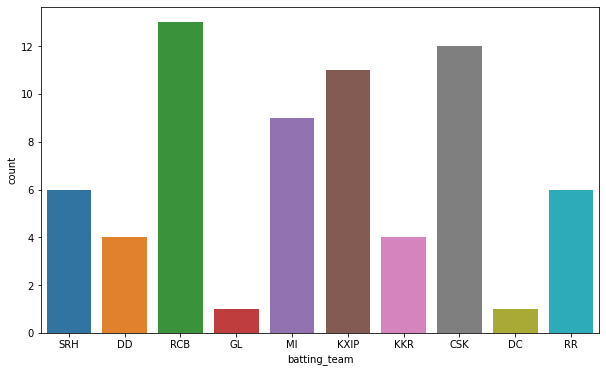

In [178]:
plt.figure(figsize=(10,6))
sns.countplot(score_200['batting_team'])


### Counting how many times Various teams scored <100 runs in an innings

C:\Users\Eren Yaeger\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

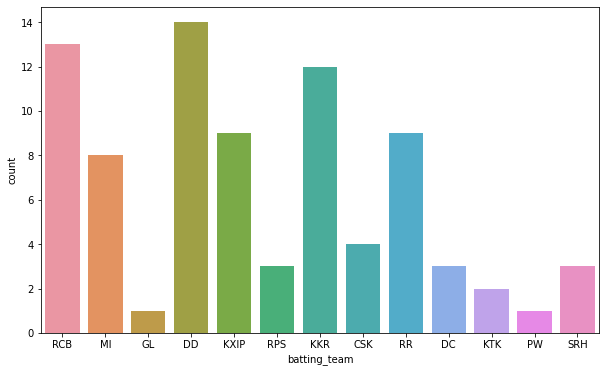

In [172]:
plt.figure(figsize=(10,6))
sns.countplot(score_100['batting_team'])

### Counting the number of times a bowling team has conceeded above 200 runs.

C:\Users\Eren Yaeger\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bowling_team', ylabel='count'>

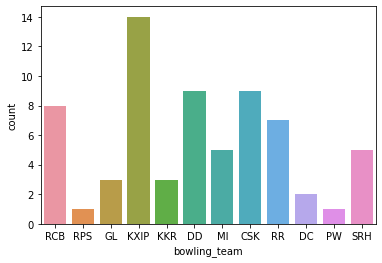

In [171]:
sns.countplot(score_200['bowling_team'])

#### 1st two graph shows the number of times a team has scored above 200 runs. 2nd graph shows the number of times a bowling team has conceeded above 200 runs.

## Counting how many times team scores >200 runs against various team

In [ ]:
high_200=df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_200.set_index(['match_id'],inplace=True)

#### Maximum runs in an Innings

In [30]:
high_200['total_runs'].max()

263

In [32]:
high_200.head()

,inning,batting_team,bowling_team,total_runs
match_id,,,,
1,1,SRH,RCB,207
1,2,RCB,SRH,172
2,1,MI,RPS,184
2,2,RPS,MI,187
3,1,GL,KKR,183


In [33]:
high=high_200.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team bowling_team       
1      CSK          DD                1
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                1
                    SRH               2
       DC           RR                1
       DD           KXIP              1
                    MI                1
                    RPS               1
       GL           DD                1
       KKR          DC                1
                    KXIP              1
                    RCB               1
       KXIP         CSK               2
                    MI                1
                    RCB               2
                    RR                1
       MI           CSK               1
                    DD                4
                    RCB               1
                    RR                1
       RCB          CSK               1
                    DD                1
                    GL                2
                    KXIP              3
                    MI                1
                    PW                1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DD                1
                    KXIP              1
       SRH          KKR               1
                    KXIP              2
                    RCB               2
                    RR                1
2      CSK          KXIP              1
                    RCB               1
                    RR                1
       DD           GL                1
       KKR          KXIP              1
       KXIP         CSK               2
                    DD                1
                    KKR               1
                    SRH               1
       MI           CSK               1
                    KXIP              1
       RCB          KXIP              1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1

# Batsman Comparison

#### Batsman and total balls played by them

In [71]:
balls=df.groupby(['batsman'])['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


#### Batsman and total runs scored by them

In [158]:
runs=df.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['batsman','runs']
runs

,batsman,runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [159]:
df.groupby(['batsman'])['batsman_runs'].sum()

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

#### Merging balls and runs table

In [73]:
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls

,batsman,ball,runs
0,A Ashish Reddy,196,280
1,A Chandila,7,4
2,A Chopra,75,53
3,A Choudhary,20,25
4,A Flintoff,57,62
...,...,...,...
456,YV Takawale,183,192
457,Yashpal Singh,67,47
458,Younis Khan,7,3
459,Yuvraj Singh,2050,2591


In [74]:
four=df[df['batsman_runs']==4]

#### Counting no. of fours by various Batsman

In [75]:
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['batsman','4s']
runs_4

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [85]:
max_4= runs_4[runs_4['4s']==runs_4['4s'].max()]
max_4

,batsman,4s
112,G Gambhir,484


##### Gautam Gambhir hitted most 4s in IPL

#### Counting no. of Six by various Batsman

In [ ]:
six=df[df['batsman_runs']==6]

In [161]:
runs_6=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns=['batsman','6s']
runs_6

,batsman,6s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


### Concatenating runs, balls, 4s, 6s

In [162]:
player=pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],six.iloc[:,1]],axis=1)
player

,batsman,runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15
1,A Chandila,4,7,7.0,0
2,A Chopra,53,75,1.0,0
3,A Choudhary,25,20,5.0,1
4,A Flintoff,62,57,3.0,2
...,...,...,...,...,...
456,YV Takawale,192,183,NaN,3
457,Yashpal Singh,47,67,NaN,0
458,Younis Khan,3,7,NaN,0
459,Yuvraj Singh,2591,2050,NaN,141


In [163]:
player['strike_rate']=player['runs']/player['ball']
player.head()

,batsman,runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15,1.428571
1,A Chandila,4,7,7.0,0,0.571429
2,A Chopra,53,75,1.0,0,0.706667
3,A Choudhary,25,20,5.0,1,1.250000
4,A Flintoff,62,57,3.0,2,1.087719


### No. of Missing Values in each Coulumn

In [93]:
player.isna().sum()

batsman         0
runs            0
ball            0
4s             93
6s              0
strike_rate     0
dtype: int64

#### Filling Missing values with zero

In [94]:
player['4s'].fillna(0,inplace=True)

In [95]:
player.isna().sum()

batsman        0
runs           0
ball           0
4s             0
6s             0
strike_rate    0
dtype: int64

#### Checking if any missing value left

In [45]:
player.isnull().values.any()

False

#### Every Scores by Every Batsman in Every Match

In [98]:
grp=df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
...,...,...,...,...
9510,636,SR Watson,RCB,11
9511,636,STR Binny,RCB,9
9512,636,Sachin Baby,RCB,18
9513,636,V Kohli,RCB,54


#### Maximum runs Scored by Every Batsman

In [99]:
max=grp.groupby(['batsman'])['batsman_runs'].max().reset_index()
max.columns=['batsman','max_runs']
max

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24
...,...,...
456,YV Takawale,45
457,Yashpal Singh,20
458,Younis Khan,3
459,Yuvraj Singh,83


#### Concatenating Max_runs with player Database

In [103]:
player2=pd.concat([player,max.iloc[:,1:2]],axis=1)
player2

,batsman,runs,ball,4s,6s,strike_rate,max_runs
0,A Ashish Reddy,280,196,16.0,15,1.428571,36
1,A Chandila,4,7,7.0,0,0.571429,4
2,A Chopra,53,75,1.0,0,0.706667,24
3,A Choudhary,25,20,5.0,1,1.250000,15
4,A Flintoff,62,57,3.0,2,1.087719,24
...,...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,3,1.049180,45
457,Yashpal Singh,47,67,0.0,0,0.701493,20
458,Younis Khan,3,7,0.0,0,0.428571,3
459,Yuvraj Singh,2591,2050,0.0,141,1.263902,83


In [50]:
player2.shape

(461, 7)

#### Top 10 Batsman

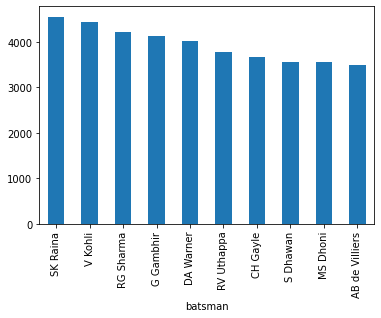

In [51]:
max_runs=df.groupby(['batsman'])['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[:10].plot.bar()

#### SK Raina has highest total runs across all seasons Whereas Virat Kohliis just few runs behind with the second spot 

## Top Individual Scores

In [52]:
df.groupby(["match_id","batsman",'batting_team'])["batsman_runs"].sum().reset_index().sort_values(by='batsman_runs', ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


#### Not only Gayle but there are many RCB players on the top scores list. Looks like RCB is a very formidable batting side.

## Highest Wicket Taker

In [53]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [54]:
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [55]:
hwt=df[df["dismissal_kind"].isin(dismissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


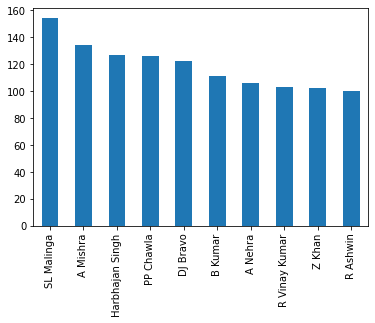

In [56]:
hwt['bowler'].value_counts()[:10].plot.bar()

In [180]:
df=pd.read_csv(r'C:\Users\Eren Yaeger\Downloads\IPL Analysis/matches.csv')
df.head(10)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,4/9/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,4/9/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,4/10/2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,4/11/2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,4/12/2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


##### Lasith Malinga leads the chart, 